# Importando bibliotecas

In [42]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import linear_model

sns.set_theme()

# Aquisição dos dados

Link: https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv

In [2]:
url = 'https://gist.githubusercontent.com/davidneves11/d72e7f49ab01c856acc5d07be4b1a9dd/raw/37631e3a40da92e6261c00fffdf0fb9b869b35dd/batimentos%2520cardiacos.csv'

In [3]:
batimentos = pd.read_csv(url)

batimentos.head(10)

,Idade,Peso,Horas de atividade,Batimentos cardiacos
0,44.247295,53.591343,3.397836,82.307425
1,81.427930,172.569375,33.142344,179.045377
2,50.807130,74.582817,8.645704,103.522796
3,55.778712,90.491878,12.622969,114.239779
4,53.790400,84.129280,11.032320,107.184063
5,67.915027,129.328086,22.332022,142.637469
6,78.985955,164.755057,31.188764,173.544747
7,67.860845,129.154703,22.288676,142.660185
8,60.484291,105.549733,16.387433,122.848438
9,71.547935,140.953393,25.238348,153.653358


## Descrição das colunas

In [4]:
batimentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Idade                 1000 non-null   float64
 1   Peso                  1000 non-null   float64
 2   Horas de atividade    1000 non-null   float64
 3   Batimentos cardiacos  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


# Análise Exploratória

## Análise inicial dos valores

In [5]:
batimentos.describe()

,Idade,Peso,Horas de atividade,Batimentos cardiacos
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.845210,122.704671,20.676168,138.168423
std,8.505102,27.216325,6.804081,21.521514
min,40.000000,40.000000,0.000000,70.000000
25%,60.219824,104.703436,16.175859,123.926952
50%,65.735216,122.352692,20.588173,137.747897
75%,71.462362,140.679557,25.169889,151.993406
max,90.000000,200.000000,40.000000,200.000000


## Quantidade de pessoas por idade

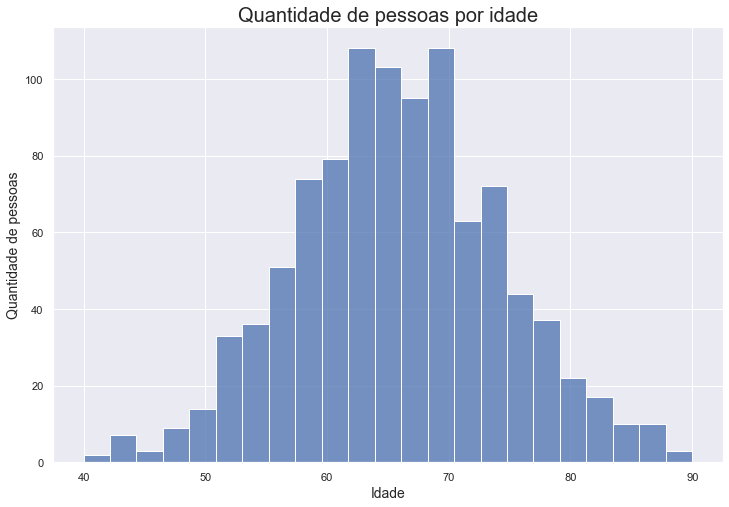

In [14]:
plt.figure(figsize=(12, 8))

sns.histplot(batimentos, x='Idade')

plt.title('Quantidade de pessoas por idade', fontsize=20)
plt.ylabel('Quantidade de pessoas', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.show()

Pelo gráfico é possível perceber que na nossa base de dados há uma quantidade predominante de pessoas com idades entre 55 e 75 anos.

## Batimentos cardíacos em função da idade

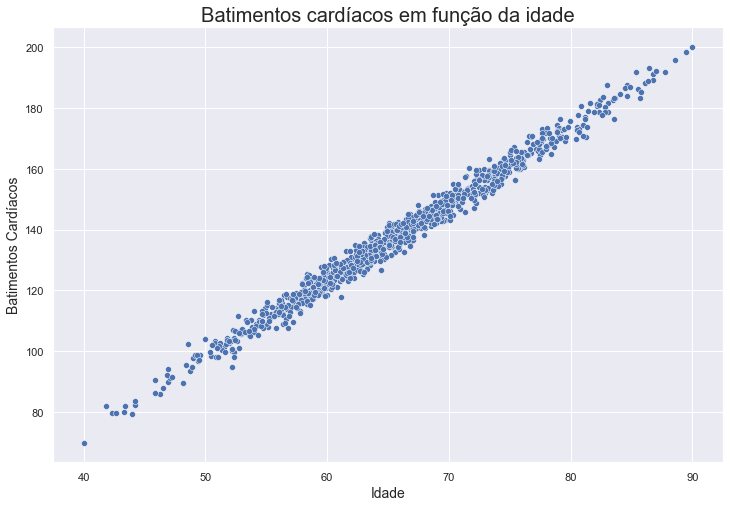

In [18]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=batimentos, x='Idade', y='Batimentos cardiacos')

plt.title('Batimentos cardíacos em função da idade', fontsize=20)
plt.ylabel('Batimentos Cardíacos', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.show()

É possível perceber que há uma tendência muito grande de linearidade. Se traçarmos uma linha fica ainda mais evidente.

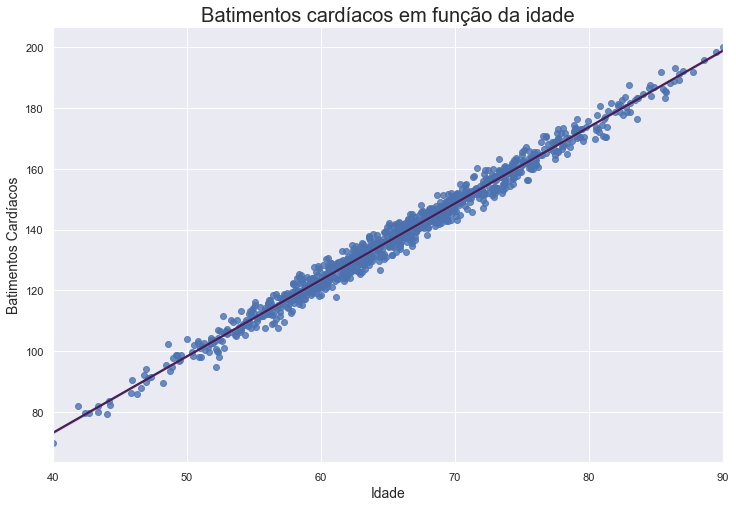

In [22]:
plt.figure(figsize=(12, 8))

sns.regplot(data=batimentos, x='Idade', y='Batimentos cardiacos', line_kws={'color': '#451F55'})

plt.title('Batimentos cardíacos em função da idade', fontsize=20)
plt.ylabel('Batimentos Cardíacos', fontsize=14)
plt.xlabel('Idade', fontsize=14)
plt.show()

## Densidade de pessoas por peso

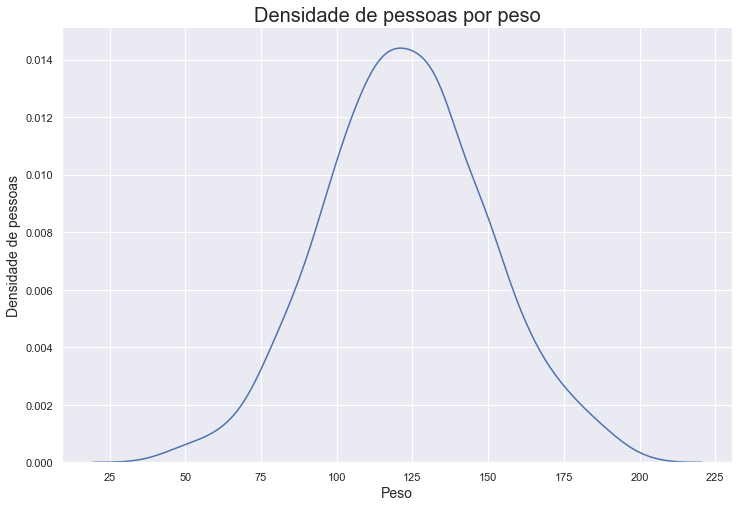

In [29]:
plt.figure(figsize=(12, 8))

sns.kdeplot(data=batimentos, x='Peso')

plt.title('Densidade de pessoas por peso', fontsize=20)
plt.ylabel('Densidade de pessoas', fontsize=14)
plt.xlabel('Peso', fontsize=14)
plt.show()

É possível notar uma concentração maior entre os pesos de 80Kg e 160Kg 

## Batimentos cardíacos em função do peso

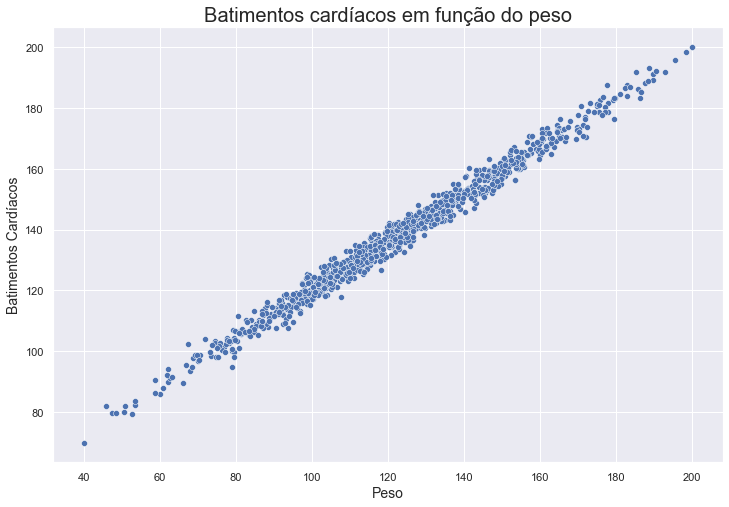

In [30]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=batimentos, x='Peso', y='Batimentos cardiacos')

plt.title('Batimentos cardíacos em função do peso', fontsize=20)
plt.ylabel('Batimentos Cardíacos', fontsize=14)
plt.xlabel('Peso', fontsize=14)
plt.show()

Novamente é possível perceber que há uma tendência muito grande de linearidade. Traçando novamente uma linha temos:

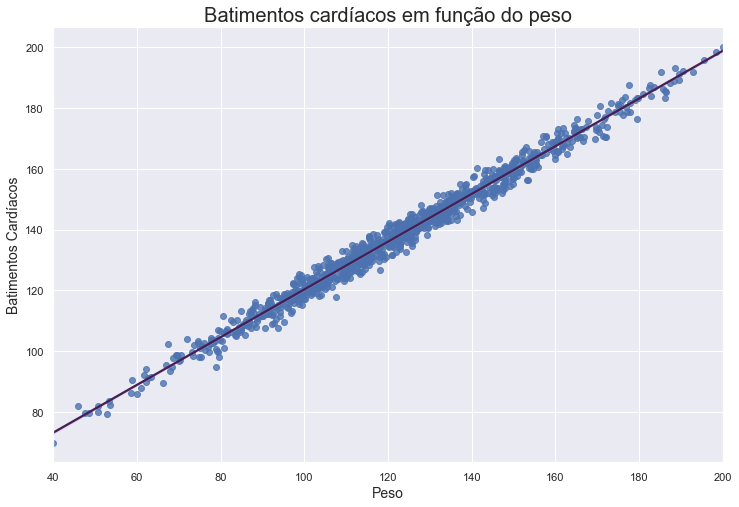

In [32]:
plt.figure(figsize=(12, 8))

sns.regplot(data=batimentos, x='Peso', y='Batimentos cardiacos', line_kws={'color': '#451F55'})

plt.title('Batimentos cardíacos em função do peso', fontsize=20)
plt.ylabel('Batimentos Cardíacos', fontsize=14)
plt.xlabel('Peso', fontsize=14)
plt.show()

# Criando modelo para regressão

## Particionando em conjuntos x e y

In [36]:
x = batimentos[['Idade', 'Peso']]

x.head(10)

,Idade,Peso
0,44.247295,53.591343
1,81.427930,172.569375
2,50.807130,74.582817
3,55.778712,90.491878
4,53.790400,84.129280
5,67.915027,129.328086
6,78.985955,164.755057
7,67.860845,129.154703
8,60.484291,105.549733
9,71.547935,140.953393


In [37]:
y = batimentos['Batimentos cardiacos']

y.head(10)

0     82.307425
1    179.045377
2    103.522796
3    114.239779
4    107.184063
5    142.637469
6    173.544747
7    142.660185
8    122.848438
9    153.653358
Name: Batimentos cardiacos, dtype: float64

## Particionado os conjuntos x e y em treino e teste

In [40]:
SEED = 73

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=SEED)

In [43]:
rgs = linear_model.LinearRegression(fit_intercept=False, normalize=True)

In [44]:
rgs.fit(x_train, y_train)

LinearRegression(fit_intercept=False, normalize=True)

In [46]:
print('Porcentagem de acerto: {:.2f}%'.format(rgs.score(x_test, y_test) * 100))

Porcentagem de acerto: 98.39%


Por fim, foi possível criar um modelo com uma porcentagem de acerto alta.